**Task:- Use a dataset that includes information about
housing prices and features like square
footage, number of bedrooms, etc. to train a
model that can predict the price of a new
house**

# **1. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
HousePrice = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
HousePrice.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
HousePrice.shape

(21613, 21)

In [ ]:
HousePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
HousePrice.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# **2. Data Checks**

### **2.1 Check for Null Values**

In [ ]:
HousePrice.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### **2.2 Checks for Unique Values**

In [ ]:
HousePrice.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

### **2.3 Check for Duplicated Values**

In [ ]:
HousePrice.duplicated().sum()

0

# **3. Exploratory Data Analysis**

### **3.1 Histplot of "Pricing"**

<Axes: xlabel='price', ylabel='Count'>

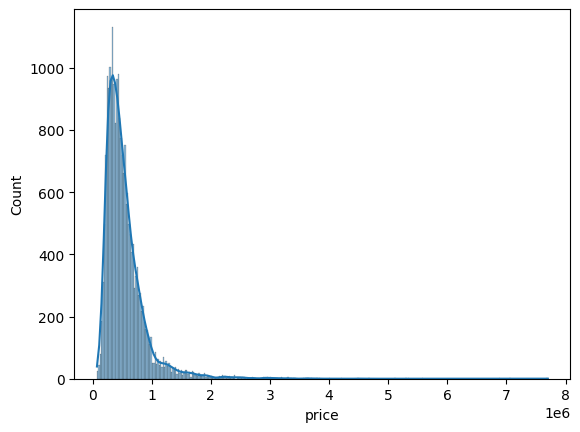

In [ ]:
sns.histplot(HousePrice['price'], kde=True)

### **3.2 Countplot of "Bedrooms"**

<Axes: xlabel='count', ylabel='bedrooms'>

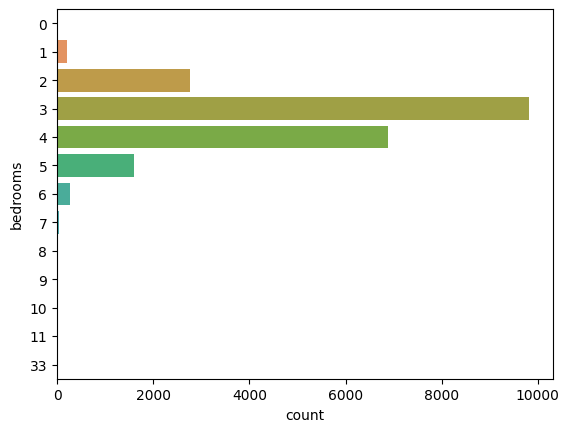

In [ ]:
sns.countplot(y=HousePrice['bedrooms'])

### **3.3 Countplot of "Condition"**

<Axes: xlabel='condition', ylabel='count'>

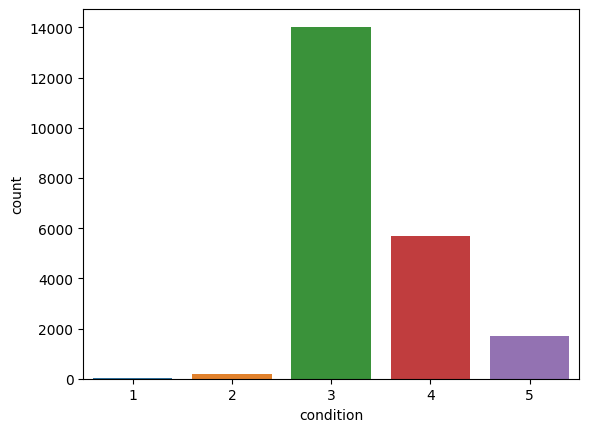

In [ ]:
sns.countplot(x=HousePrice['condition'])

### **3.4 Catplot of "floors"**

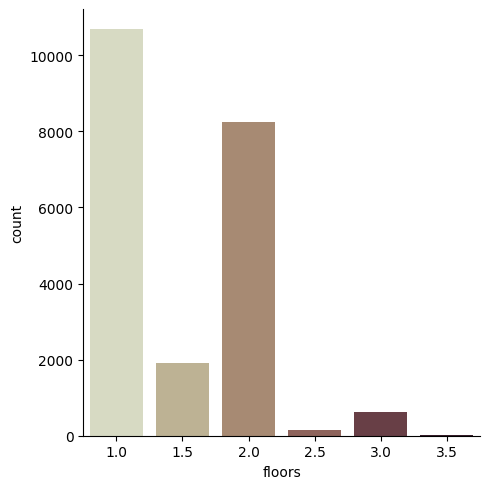

In [ ]:
sns.catplot(data=HousePrice, x="floors", kind="count", palette="ch:.50")

### **3.5 Histplot of "Bathrooms"**

<Axes: xlabel='bathrooms', ylabel='Count'>

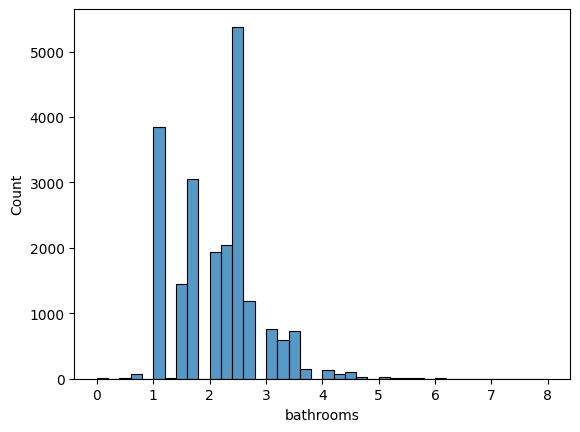

In [ ]:
sns.histplot(HousePrice, x='bathrooms', element='bars', fill=True, binwidth=0.2)

### **3.6 Scatterplot of "square ft"**

<Axes: xlabel='sqft_living', ylabel='price'>

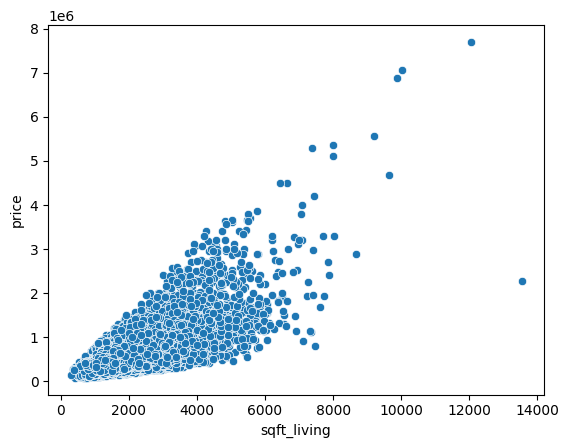

In [ ]:
sns.scatterplot(HousePrice, x='sqft_living', y='price')

**The graph represents the relationship between the number of bedrooms in a house and its average price. This information can be helpful for people who are thinking about buying a house, as it can help them to determine how many bedrooms they need and how much they are willing to spend.**

### **3.7 Catplot of "Bedrooms"**

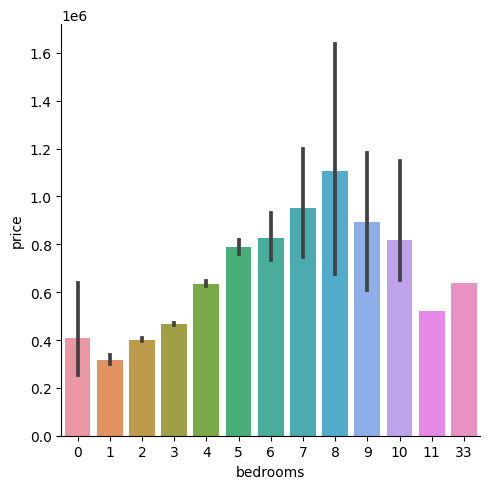

In [ ]:
sns.catplot(data=HousePrice, kind="bar", x="bedrooms", y="price")

**The demand for houses with more bedrooms is higher than the demand for houses with fewer bedrooms. This is likely because houses with more bedrooms are more suitable for families with children.**


### **3.8 Histplot of "floors" with "price"**

<Axes: xlabel='floors', ylabel='price'>

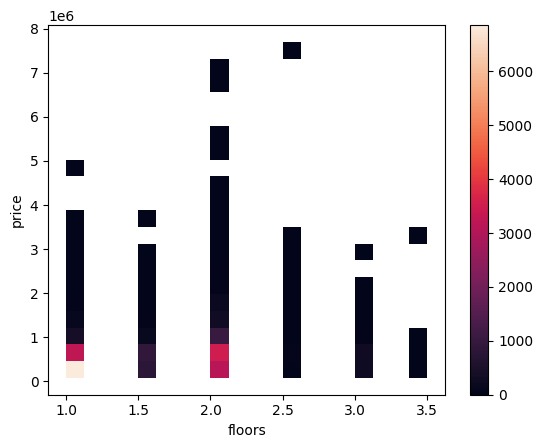

In [ ]:
sns.histplot(data=HousePrice, x='floors', y='price', bins=20, cbar=True, cmap='rocket')

- These insights suggest that the demand for houses with more floors is higher than the demand for houses with fewer floors. This is likely because houses with more floors are more suitable for families with children.

### **3.9 Dealing with Outliers:**

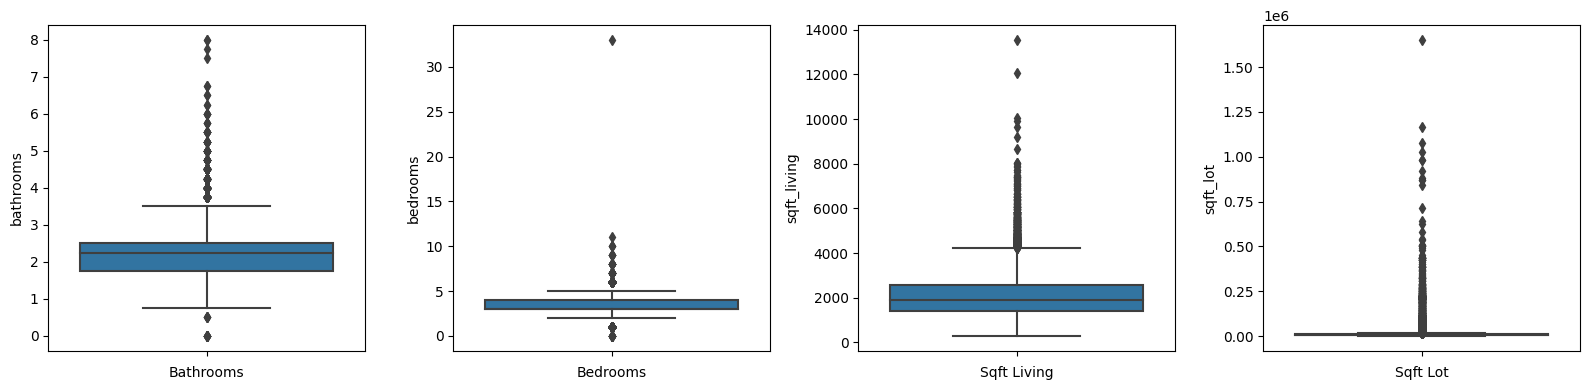

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

sns.boxplot(y=HousePrice['bathrooms'], ax=axes[0]).set(xlabel='Bathrooms')
sns.boxplot(y=HousePrice['bedrooms'], ax=axes[1]).set(xlabel='Bedrooms')
sns.boxplot(y=HousePrice['sqft_living'], ax=axes[2]).set(xlabel='Sqft Living')
sns.boxplot(y=HousePrice['sqft_lot'], ax=axes[3]).set(xlabel='Sqft Lot')

plt.tight_layout()

plt.show()

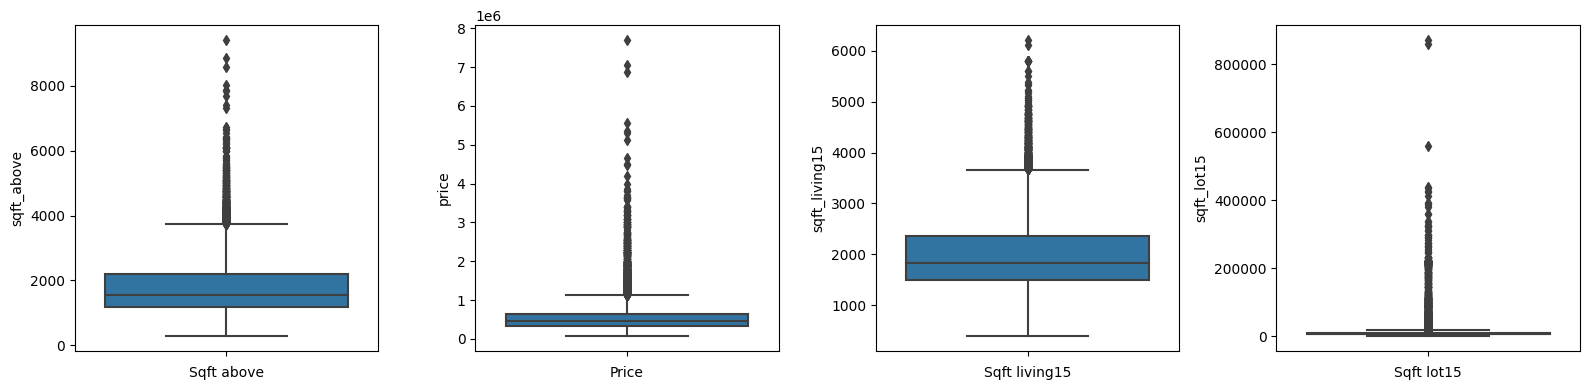

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

sns.boxplot(y=HousePrice['sqft_above'], ax=axes[0]).set(xlabel='Sqft above')
sns.boxplot(y=HousePrice['price'], ax=axes[1]).set(xlabel='Price')
sns.boxplot(y=HousePrice['sqft_living15'], ax=axes[2]).set(xlabel='Sqft living15')
sns.boxplot(y=HousePrice['sqft_lot15'], ax=axes[3]).set(xlabel='Sqft lot15')

plt.tight_layout()
plt.show()

### **Capping Outliers:**

In [ ]:
House_price = HousePrice.copy()
House_price = House_price.drop(columns=['id', 'date', 'zipcode'],axis=1)
Q1 = House_price.quantile(0.25)
Q3 = House_price.quantile(0.75)
IQR = Q3 - Q1

lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

In [ ]:
House_price_capped = House_price.copy()
for column in House_price.columns:
    House_price_capped[column] = np.where(
        House_price_capped[column] > upper_bounds[column], upper_bounds[column], House_price_capped[column]
    )
    House_price_capped[column] = np.where(
        House_price_capped[column] < lower_bounds[column], lower_bounds[column], House_price_capped[column]
    )

House_price_capped.shape

(21613, 18)

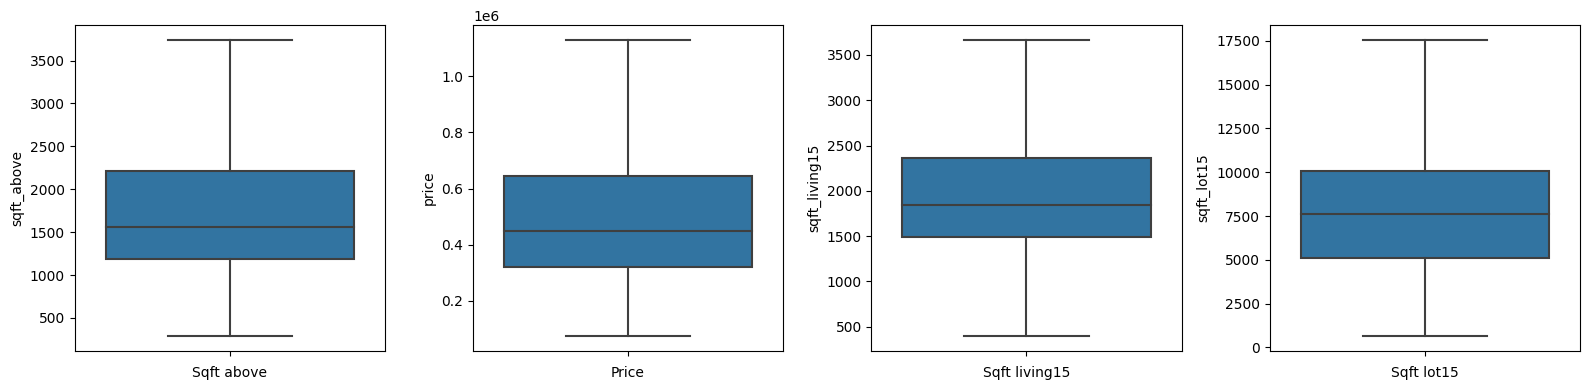

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

sns.boxplot(y=House_price_capped['sqft_above'], ax=axes[0]).set(xlabel='Sqft above')
sns.boxplot(y=House_price_capped['price'], ax=axes[1]).set(xlabel='Price')
sns.boxplot(y=House_price_capped['sqft_living15'], ax=axes[2]).set(xlabel='Sqft living15')
sns.boxplot(y=House_price_capped['sqft_lot15'], ax=axes[3]).set(xlabel='Sqft lot15')

plt.tight_layout()
plt.show()

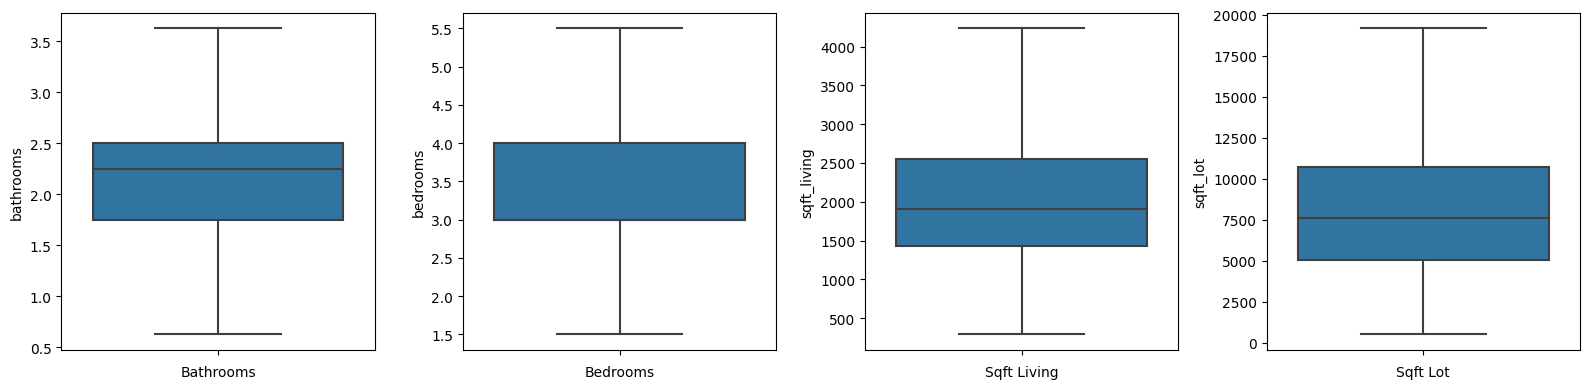

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

sns.boxplot(y=House_price_capped['bathrooms'], ax=axes[0]).set(xlabel='Bathrooms')
sns.boxplot(y=House_price_capped['bedrooms'], ax=axes[1]).set(xlabel='Bedrooms')
sns.boxplot(y=House_price_capped['sqft_living'], ax=axes[2]).set(xlabel='Sqft Living')
sns.boxplot(y=House_price_capped['sqft_lot'], ax=axes[3]).set(xlabel='Sqft Lot')

plt.tight_layout()
plt.show()

# **4. Training and Testing Data**

In [ ]:
X = House_price_capped.drop('price',axis=1)
y = House_price_capped['price']

In [ ]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


         Variable            VIF
0        bedrooms      28.611312
1       bathrooms      31.375477
2     sqft_living     572.369219
3        sqft_lot      24.112687
4          floors      19.999506
5      waterfront            NaN
6            view            NaN
7       condition      34.381584
8           grade     178.985968
9      sqft_above     441.810585
10  sqft_basement      28.810188
11       yr_built    7828.225074
12   yr_renovated            NaN
13            lat  119724.891151
14           long  131125.958048
15  sqft_living15      30.599209
16     sqft_lot15      28.355536


In [ ]:
pd.options.display.float_format = '{:.10f}'.format
X_train = sm.add_constant(X)

model = sm.OLS(y, X).fit()
p_values = model.pvalues
p_values_df = pd.DataFrame({"variable" : X.columns, "P-value" : p_values})

print("Variable Names and P-values:")
print(p_values_df)

Variable Names and P-values:
                    variable      P-value
bedrooms            bedrooms 0.0000000000
bathrooms          bathrooms 0.0000000000
sqft_living      sqft_living 0.0000000000
sqft_lot            sqft_lot 0.0002271235
floors                floors 0.0000000000
waterfront        waterfront 0.0000000000
view                    view 0.0000000000
condition          condition 0.0000000000
grade                  grade 0.0000000000
sqft_above        sqft_above 0.0078250241
sqft_basement  sqft_basement 0.2266670007
yr_built            yr_built 0.0000000000
yr_renovated    yr_renovated 0.0000000000
lat                      lat 0.0000000000
long                    long 0.0000000000
sqft_living15  sqft_living15 0.0000000000
sqft_lot15        sqft_lot15 0.0002772832


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

# **5. Model Building:**

### **5.1 XGBoost Regressor**

In [ ]:
xg_model = xgb.XGBRegressor(objective='reg:linear',
                            n_estimators=100,
                            learning_rate=0.1,
                            max_depth=3
                          )

xg_model.fit(X_train, y_train)

y_pred_test = xg_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTesting Data Metrics: XG-Boost : ")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R-squared (R2) Score: {r2_test:.2f}")


Testing Data Metrics: XG-Boost : 
Mean Absolute Error (MAE): 65176.82
R-squared (R2) Score: 0.86


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:27:10] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


### **5.2 Linear Regression**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_test = linear_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTesting Data Metrics: Linear Regression : ")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R-squared (R2) Score: {r2_test:.2f}")


Testing Data Metrics: Linear Regression : 
Mean Absolute Error (MAE): 97722.47
R-squared (R2) Score: 0.73


### **5.3 Gradient Boosting Regressor**

In [ ]:
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=100,
    min_samples_leaf=3
)

gb_regressor.fit(X_train, y_train)

y_pred_test_gb = gb_regressor.predict(X_test)
mae_gb_test = mean_absolute_error(y_test, y_pred_test_gb)
r2_gb_test = r2_score(y_test, y_pred_test_gb)

print("Test Data Metrics : Gradient Boosting Regression : ")
print(f"Mean Absolute Error (MAE): {mae_gb_test:.2f}")
print(f"R-squared (R2) Score: {r2_gb_test:.2f}")

Test Data Metrics : Gradient Boosting Regression : 
Mean Absolute Error (MAE): 57251.31
R-squared (R2) Score: 0.89


### **5.4 Random Forest Regressor**

In [ ]:
rfc = RandomForestRegressor(max_depth=7, random_state=120, min_samples_split=5, min_samples_leaf=3)
rfc.fit(X_train, y_train)

y_pred_test = rfc.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Testing Data Metrics : RandomForest Regressor : ")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R-squared (R2) Score: {r2_test:.2f}")

Testing Data Metrics : RandomForest Regressor : 
Mean Absolute Error (MAE): 70216.15
R-squared (R2) Score: 0.84


**The Gradient Boosting Regression model seems to be performing the best, closely followed by XG-Boost. These models provide the comparatively lower mean absolute errors and the highest R2 scores, indicating their ability to predict house prices effectively.**